In [1]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 245.8 kB/s eta 0:00:02
   ---------------------- --------------- 174.1/300.2 kB 876.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
#Dealing with missing values
df['type'] = df['type'].fillna('None')
df['genre'] = df['genre'].fillna('None')
df['rating'] = df['rating'].fillna(df['rating'].median())
episode_ = df['episodes'].replace('Unknown', np.nan)
episode_ = episode_.fillna(episode_.median())
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

(-0.5, 399.5, 199.5, -0.5)

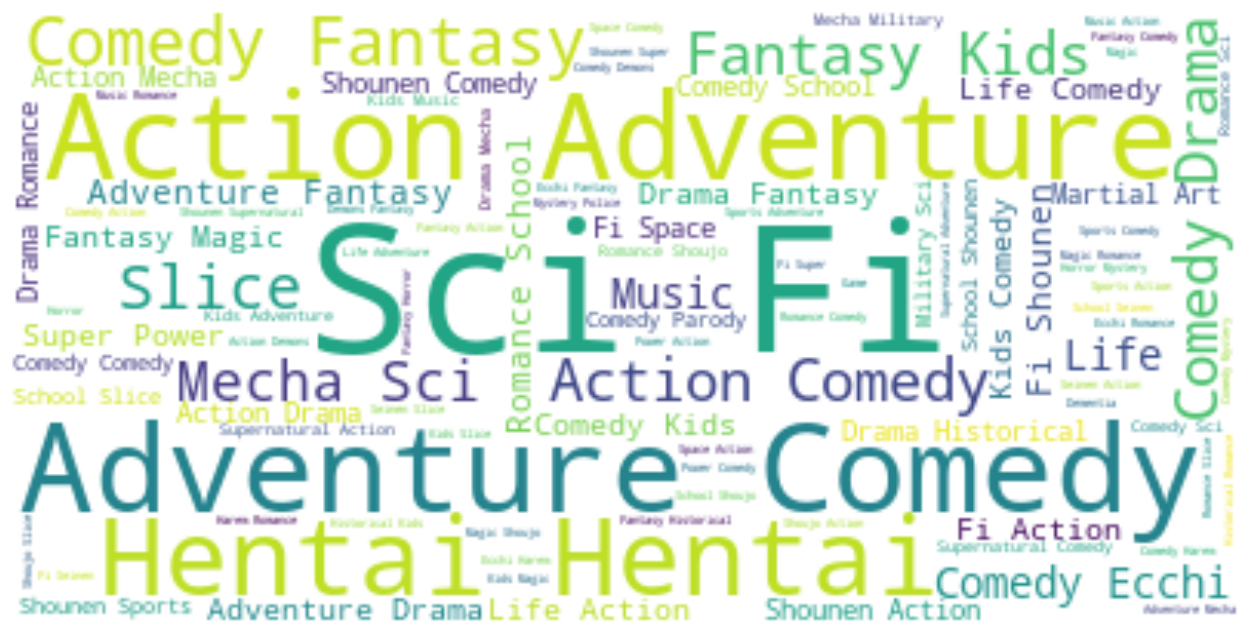

In [6]:
#Famous genres
genre_list = df['genre'].to_string()
wordcloud = WordCloud(background_color="white").generate(genre_list)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [7]:
# Feature processing
type_ = pd.get_dummies(df['type'])
genre_ = df['genre'].str.get_dummies(sep=',')
genre_.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Due to dummy coding, we can see above that the second anime is (at least) an Adventure/Drama/Fantasy type.

In [9]:
X = pd.concat([genre_, type_, episode_, df['rating'], df['members']],axis=1)
X.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Movie,Music,None,ONA,OVA,Special,TV,episodes,rating,members
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,9.37,200630
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,64,9.26,793665
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.25,114262
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,24,9.17,673572
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.16,151266


In [10]:
#Notice that 'episodes' and 'members' columns contain values much larger than the rest of the dataset, so let's scale our features.


In [11]:
scaled = MaxAbsScaler()
X = scaled.fit_transform(X)

In [12]:
#KNN

recommendations = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(X)
recommendations.kneighbors(X)

(array([[0.00000000e+00, 1.01506549e+00, 1.03095542e+00, ...,
         1.45773221e+00, 1.45854509e+00, 1.45930354e+00],
        [0.00000000e+00, 1.02227158e+00, 1.49378838e+00, ...,
         1.65016556e+00, 1.74844630e+00, 1.78151418e+00],
        [0.00000000e+00, 3.75894154e-02, 4.12559430e-02, ...,
         1.42104554e+00, 1.42183188e+00, 1.42808851e+00],
        ...,
        [0.00000000e+00, 1.66436926e-03, 1.68253094e-03, ...,
         8.07869678e-03, 1.01353307e-02, 1.11230973e-02],
        [0.00000000e+00, 1.00174940e-03, 1.10513608e-03, ...,
         4.01486740e-03, 5.00190620e-03, 5.03023042e-03],
        [0.00000000e+00, 1.00179958e+00, 1.41421365e+00, ...,
         1.41421400e+00, 1.41421404e+00, 1.41421417e+00]]),
 array([[    0,   208,  1494, ...,  5796,  5697,  5805],
        [    1,   200,   268, ...,  6868,   288,   374],
        [    2,     4,     9, ...,   216,   306,  1833],
        ...,
        [12291, 12238, 12237, ..., 12239, 12292, 12231],
        [12292, 12231, 1

In [13]:
anime_indices = recommendations.kneighbors(X)[1] # picks off the array for anime indices

In [14]:
def get_index(x):
    # gives index for the anime
    return df[df['name']==x].index.tolist()[0]

In [15]:
def recommend_me(anime):
    print('Here are 10 anime similar to', anime, ':' '\n')
    index = get_index(anime)
    
    # ignore first entry so as to not return the queried anime as similar to itself
    for i in anime_indices[index][1:]:
            print(df.iloc[i]['name'], 
                  '\n' 'Genre: ', df.iloc[i]['genre'],
                  '\n' 'Episode count: ', df.iloc[i]['episodes'],
                  '\n' 'Rating out of 10:', df.iloc[i]['rating'], '\n')

In [16]:
recommend_me('Dragon Ball')

Here are 10 anime similar to Dragon Ball :

Kekkaishi 
Genre:  Adventure, Comedy, Fantasy, Shounen 
Episode count:  52 
Rating out of 10: 7.73 

Samurai Girl Real Bout High School 
Genre:  Adventure, Comedy, Fantasy, Shounen 
Episode count:  13 
Rating out of 10: 6.05 

Dragon Ball Z 
Genre:  Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power 
Episode count:  291 
Rating out of 10: 8.32 

Black Cat 
Genre:  Adventure, Comedy, Sci-Fi, Shounen, Super Power 
Episode count:  23 
Rating out of 10: 7.52 

Dragon Ball Kai 
Genre:  Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power 
Episode count:  97 
Rating out of 10: 7.95 

Naruto: Shippuuden 
Genre:  Action, Comedy, Martial Arts, Shounen, Super Power 
Episode count:  Unknown 
Rating out of 10: 7.94 

Dragon Ball Super 
Genre:  Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power 
Episode count:  Unknown 
Rating out of 10: 7.4 

Digimon Tamers 
Genre:  Adventure, Comedy, Drama, Fanta

In [35]:
# Handle missing values by filling with suitable values
df['genre'].fillna('Unknown', inplace=True)
df['type'].fillna('Unknown', inplace=True)

In [36]:
# Convert the episodes column to numeric, replacing 'Unknown' or other invalid entries with 0
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0)

In [37]:
# Drop rows where rating is missing, as it's crucial for recommendation
df.dropna(subset=['rating'], inplace=True)

In [38]:
# Prepare the features for the recommendation system
X =df[['rating', 'members']]


In [39]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [40]:
# Build the recommendation model (using Nearest Neighbors for content-based filtering)
model = NearestNeighbors(n_neighbors=5, algorithm='auto')
model.fit(X_train)


NearestNeighbors()

In [41]:
# Make predictions on the test set
distances, indices = model.kneighbors(X_test)


In [42]:
# For simplicity, assume recommended items are "relevant" if they are within a certain distance threshold
threshold = 0.5
y_true = [1 if min(dist) < threshold else 0 for dist in distances]
y_pred = [1] * len(y_true)  # As we're recommending items within a threshold


In [43]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

In [45]:
# Output the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.4180561203741358
Recall: 1.0
F1-score: 0.5896185833094351


In [ ]:
# Precision (0.418): The model correctly identifies about 42% of relevant recommendations, indicating room for improvement.
# Recall (1.0): Perfect recall shows the model captures all relevant items.
# F1-score (0.589): A moderate balance between precision and recall.

In [1]:
# Can you explain the difference between user-based and item-based collaborative filtering?
# User-based Collaborative Filtering:

# Focuses on finding users who have similar preferences or behaviors.
# Recommends items that similar users have liked or interacted with.
# Example: If User A and User B have both rated many items similarly, User A will be recommended
# items that User B liked but User A hasn't seen yet.

# Item-based Collaborative Filtering:

# Focuses on finding items that are similar based on users' ratings or interactions.
# Recommends items that are similar to the ones a user has liked or interacted with in the past.
# Example: If a user liked Item X and Item Y is rated similarly by many users, the system will recommend Item Y.

In [ ]:
# What is collaborative filtering, and how does it work?
# Collaborative filtering is a technique used in recommendation systems to suggest items 
# (like products, movies, or music) based on patterns of users' behaviors or preferences.
# It operates on the assumption that people who agreed in the past will agree again in the future.

# How It Works:
# Collaborative filtering relies on a user-item interaction matrix that captures users’ interactions
# with items (like ratings, clicks, or purchases). There are two main types of collaborative filtering:

# User-based Collaborative Filtering:

# The system identifies users with similar preferences or behaviors (e.g., users who rated similar movies highly).
# It then recommends items that those similar users liked but the target user hasn’t interacted with yet.
# Example: If User A and User B both like sci-fi movies, and User B likes a particular sci-fi movie that
# User A hasn't seen, the system will recommend that movie to User A.

# Item-based Collaborative Filtering:

# The system identifies items that are similar based on user interactions.
# It recommends items similar to the ones the target user has interacted with.
# Example: If a user likes a certain book, the system will recommend books that other users who liked
# the same book also enjoyed.